In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import init_printing
init_printing(use_unicode = True)
import scipy as sp
from scipy import stats


# Función que calcula las incertidumbres de los datos

$$\Delta V= \sqrt{\left(\frac{\partial V}{\partial x}\right)^{2}\Delta x^{2}+\left(\frac{\partial V}{\partial y}\right)^{2}\Delta y^{2}+\left(\frac{\partial V}{\partial z}\right)^{2}\Delta z^{2}+...}$$

+ Cambio de escala
$$Y=cK \qquad \Delta Y =\mid c\mid\Delta X $$
+ Potencias
$$Y =cX^{k} \qquad \Delta Y =\left|\frac{kY}{X} \right|\Delta X  $$
+ Suma 
$$Y = X_{1}\pm X_{2} \qquad \Delta Y = |Y|\sqrt{\left(\frac{\Delta X_{1}}{X_{1}}\right)^{2}+\left(\frac{\Delta X_{2}}{X_{2}}\right)^{2}}$$
+ Producto
$$Y = X_{1}X_{2} \qquad \Delta Y = |Y|\sqrt{\left(\frac{\Delta X_{1}}{X_{1}}\right)^{2}+\left(\frac{\Delta X_{2}}{X_{2}}\right)^{2}}$$
+ División
$$Y = \frac{X_{1}}{X_{2}} \qquad \Delta Y = |Y|\sqrt{\left(\frac{\Delta X_{1}}{X_{1}}\right)^{2}+\left(\frac{\Delta X_{2}}{X_{2}}\right)^{2}}$$



In [2]:
def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/(len(y)*xi2-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])


    
    

# Termopar 

Están consignadas las mediciones en las listas, con una temperatura inicial $T_{o} = 31 $ y final de $T_{f} = 89$ (No recuerdo la unidades de temperatura). 

In [3]:
To = 31 ; Tf = 89
T = np.linspace(To,Tf,Tf-To+1)
V = np.array([0.4,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.7,0.8,0.8,0.9,0.9,1.,1.,1.,1.1,1.1,1.2,1.2,1.2,1.3,1.3,1.4,1.4,
             1.5,1.5,1.6,1.6,1.6,1.7,1.8,1.8,1.8,1.9,1.9,1.9,2.,2.,2.1,2.1,2.2,2.2,2.2,2.3,2.3,2.4,2.4,2.5,2.5,2.6,
             2.6,2.7,2.7,2.8,2.8,2.8,2.8])
#Parametros de la linealización

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(T,V)

Verr = 0.05
Terr = 0.5


Incertidumbre de escala temperatura 0.5
Incertidumbre de escala en el voletaje 0.05
Desviación estándar en la temperatura 17.0293863659
punto de corte -0.992343658679 Error punto de corte  0.357978893379
Pendiente 0.0432904734074 Error pendiente:  0.00573961313119


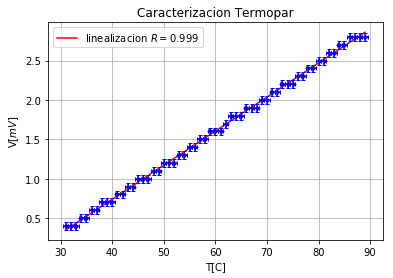

In [4]:
polynomial = np.poly1d([slope, intercept])
line = polynomial(T)
plt.plot(T, line, 'r-',label = "linealizacion $R ={0:.3f}$".format(r_value))
#"{0:.2f}".format(5.1234554321)

plt.plot( T,V, '.b') 
plt.errorbar(T, V, Verr, Terr,ecolor = "b",fmt='+b',capsize = 2)
plt.grid(True)
plt.ylabel("V$[mV]$")
plt.xlabel("T[C]")
plt.title("Caracterizacion Termopar")
plt.legend()

plt.savefig("Termopar.png")

print "Incertidumbre de escala temperatura",Terr
print "Incertidumbre de escala en el voletaje",Verr
print "Desviación estándar en la temperatura", np.std(T)
print "punto de corte", intercept,"Error punto de corte ",Error_linealizacion(T,V)[0]
print "Pendiente", slope, "Error pendiente: ",Error_linealizacion(T,V)[1]


Ahora se tiene la ecuación que relaciona la temperatura con el voltaje Falta encontrar las incertidumbres

$$V = (43.3 \pm 5.7 )\left[\frac{\mu V}{C^{o}}\right]T - (992.3 \pm 358.0) \mu V $$

# Termistor

La ecuación que caracteriza el fenómeno está dad por la siguiente expresión

$$R(T) = R_{o}e^{\pm\beta\left(\frac{1}{T}-\frac{1}{T_{o}}\right)}= R_{o}e^{\pm\frac{E_{g}}{k_{B}}\left(\frac{1}{T}-\frac{1}{T_{o}}\right)}$$

$T,T{o}$ Temperaturas absolutas.

$R_{o}$: Resistencia electrica

$k_{B} = 1.3806 \times 10^{-23}J/K $ : Constante de Boltzmann

Para caracterizar el sistema se observa que las variable a medir son $R$ y $T$, con una referencia $T_{o}$. Para esto se obtienen los siguientes datos

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


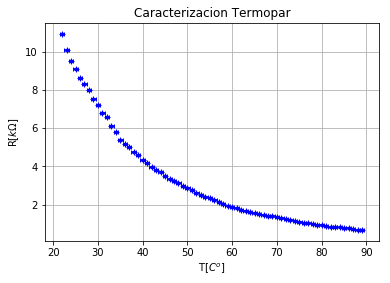

In [10]:
T0 = 22; TF = 89.05; Kb=1.3806e-23*274.15
T2 = np.linspace(T0,TF,TF-T0+1)
R = np.array([10.95,10.10,9.55,9.10,8.65,8.34,8.,7.55,7.23,6.80,6.60,6.10,5.83,5.40,5.20,5.01,4.77,4.60,4.35,4.20,3.98,3.80,3.70,
    3.50,3.34,3.22,3.12,3.0,2.85,2.75,2.62,2.52,2.42,2.32,2.24,2.14,2.05,1.95,1.89,1.80,1.74,1.66,1.60,1.56,1.50,1.46,1.42,
    1.38,1.34,1.30,1.25,1.20,1.15,1.11,1.04,1.01,0.97,0.94,0.91,0.89,0.84,0.82,0.80,0.77,0.75,0.71,0.69,0.68 ])

T0b = 80; TFb = 70
T2b = np.linspace(T0b,TFb,T0b-TFb+1)
R1 =np.array([0.92,0.95,0.98,1.02,1.06,1.10,1.14,1.18,1.23,1.28,1.33])

RErr = 0.05; T2Err = 0.5
#plt.plot(T2b,R1,"r.")
plt.plot(T2,R,"b.")
plt.errorbar(T2, R, RErr, T2Err,ecolor = "b",fmt='+b',capsize = 2)
plt.grid(True)
plt.ylabel("R$[k\Omega]$")
plt.xlabel("T$[C^{o}]$")
#plt.yscale('log')
#plt.xscale('log')
plt.title("Caracterizacion Termopar")

plt.savefig("Termistor.png")

Lo que se quiere hacer ahora es caracterizar el termistor que se tiene en estudio, para esto se manipula la ecuación que describe el sistema , linealizando se obtiene

$$r = \pm\beta t$$

Con las siguientes definiciones

$$r = ln(R/R_{o})  \qquad t = \frac{1}{T}-\frac{1}{T_{o}} \qquad \beta=\frac{E_{g}}{k_{B}}$$

Ahora se hace las sustituciones adecuadas



Ajuste por Scipy


Pendiente:  61.0751433336 Error en la pendiente : [ 0.99175689  0.01683885]
Gap:  1.44286464068
Coeficiente de correlacion:  -0.916168292528
19.6424340282


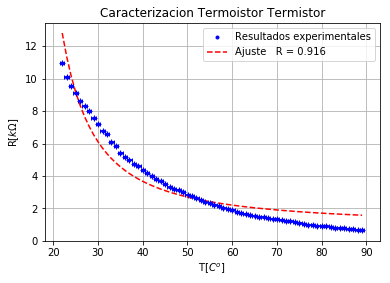

In [50]:
from scipy.optimize import curve_fit

def func(T,b,To):
    return 10.95*np.exp(b*((1/T)-(1/To)))

Kb=8.6173324e-5*274.15
(b,To),_ = curve_fit(func,T2,R)
plt.plot(T2,R,"b.", label = "Resultados experimentales")
plt.plot(T2,func(T2,b,To),"r--", label = "Ajuste   R = 0.916")
plt.errorbar(T2, R, RErr, T2Err,ecolor = "b",fmt='+b',capsize = 2)
plt.grid(True)
plt.ylabel("R$[k\Omega]$")
plt.xlabel("T$[C^{o}]$")
plt.legend()
plt.title("Caracterizacion Termoistor Termistor")
plt.savefig("Termistor_ajuste")

print "Pendiente: ",b, "Error en la pendiente :", Error_linealizacion(T2,R)
print "Gap: ",b*Kb
print "Coeficiente de correlacion: ", np.corrcoef(T2,R)[1][0]
print np.std(T2)

La relación lineal que se obtiene de tomar un eje logarítmico será

$$r = (61.07\pm 0.99)t  $$

Por lo tanto el Gap para este material será

$$E_{g} = \beta k_{B} = (1.44 \pm 0.02)\  eV$$

La expresi'ón que relaciona las dos variables es

$$R(T) = (10.95\pm 0.05)[k\Omega]e^{(61.07\pm 0.99)[C^{o}]\left(\frac{1}{T}-\frac{1}{(22.0\pm 0.5)[C^{o}]}\right)}$$



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


Punto de corte 0.937743071756 Error  0.0770781750843
Pendiente -0.0114457832847 Error  3.38245035581
constante de Boltzmann 0.0236244167746
Gap  -0.000270399954629


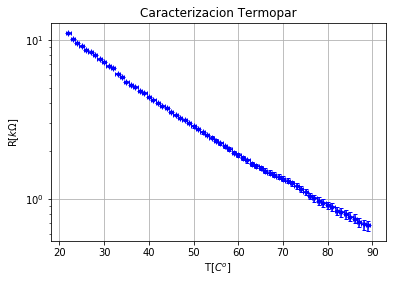

In [51]:
T0 = 22; TF = 89.05; Kb=8.6173324e-5*274.15
T2 = np.linspace(T0,TF,TF-T0+1)
R = np.array([10.95,10.10,9.55,9.10,8.65,8.34,8.,7.55,7.23,6.80,6.60,6.10,5.83,5.40,5.20,5.01,4.77,4.60,4.35,4.20,3.98,3.80,3.70,
    3.50,3.34,3.22,3.12,3.0,2.85,2.75,2.62,2.52,2.42,2.32,2.24,2.14,2.05,1.95,1.89,1.80,1.74,1.66,1.60,1.56,1.50,1.46,1.42,
    1.38,1.34,1.30,1.25,1.20,1.15,1.11,1.04,1.01,0.97,0.94,0.91,0.89,0.84,0.82,0.80,0.77,0.75,0.71,0.69,0.68 ])


r = R/10.95;t = (1/T2)-(1/T0)

RErr = 0.05; T2Err = 0.5
slope2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(T2,r)
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(T2)
#plt.plot(T2, line, 'r-', label ="Linealizacion $R ={0:.4f}$".format(r_value2)) 


#plt.plot(T2b,R1,"r.")
plt.plot(T2,R,"b.")
plt.errorbar(T2, R, RErr, T2Err,ecolor = "b",fmt='+b',capsize = 2)
plt.grid(True)
plt.ylabel("R$[k\Omega]$")
plt.xlabel("T$[C^{o}]$")
plt.yscale('log')
#plt.xscale('log')
plt.title("Caracterizacion Termopar")

print "Punto de corte", intercept2, "Error ",Error_linealizacion(t,r)[0]
print "Pendiente", slope2, "Error ", Error_linealizacion(t,r)[1]
print "constante de Boltzmann", Kb
print "Gap ", slope2*Kb

# PT 100

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


Incertidumbre de escala temperatura 0.5
Incertidumbre de escala en el voletaje 0.05
Desviación estándar en la temperatura 19.3390796058
punto de corte 99.7075903903 Error punto de corte 2.94366494842
Pendiente 0.400530768617 Error punto de corte 0.0496860896128


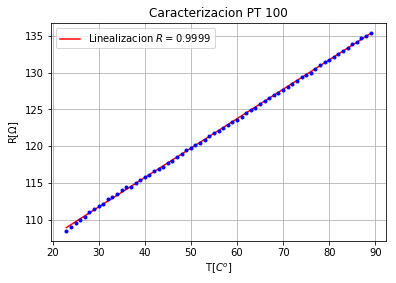

In [29]:
Txo = 23; Txf = 89.
Tx = np.linspace(Txo,Txf,Txf-Txo+1)
Rx = [108.5,109,109.5,110,110.4,111.1,111.5,111.9, 112.2,112.8,113.1,113.5,114,114.4,114.5,115,115.4,115.8,116.1,
     116.6,116.9,117.2,117.7,118,118.5,118.9,119.5,119.8,120.1,120.5,120.9,121.4,121.8,122.1,122.5,122.9,123.3,123.6,
     124,124.5,124.9,125.2,125.7,126.1,126.5,126.9,127.3,127.7,128.1,128.5,128.9,129.4,129.7,130,130.5,131,131.4,
     131.7,132.1,132.6,133,133.4,133.9,134.2,134.7,135,135.4]

TxErr = 0.5;RxErr =0.05 
slope2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(Tx,Rx)
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(Tx)
plt.plot(Tx, line, 'r-', label ="Linealizacion $R ={0:.4f}$".format(r_value2)) 
plt.plot(Tx,Rx,".b")
#plt.errorbar(Tx, Rx, RxErr, TxErr,ecolor = "k",fmt='+k',capsize = 2)
plt.grid(True)
plt.ylabel("R$[\Omega]$")
plt.xlabel("T$[C^{o}]$")
plt.title("Caracterizacion PT 100")
plt.legend()

print "Incertidumbre de escala temperatura",TxErr
print "Incertidumbre de escala en el voletaje",RxErr
print "Desviación estándar en la temperatura", np.std(Tx)
print "punto de corte", intercept2, "Error punto de corte", Error_linealizacion(Tx,Rx)[0]
print "Pendiente", slope2, "Error punto de corte", Error_linealizacion(Tx,Rx)[1]

plt.savefig("PT_100.png")

La ecuación lineal que relaciona estas dos variables será entonces 

$$R = (0.40\pm 0.05)\left[\frac{\Omega}{C}\right]T + (99.70\pm 2.94)[\Omega] $$

# Bobina de cobre 

Incertidumbre de escala temperatura 0.5
Incertidumbre de escala en el voletaje 0.05
Desviación estándar en la temperatura 25.4017715918
punto de corte 23.0389427988 Error punto de corte 0.497591341773
Pendiente 0.0914506357649 Error pendiente  0.00987801745944


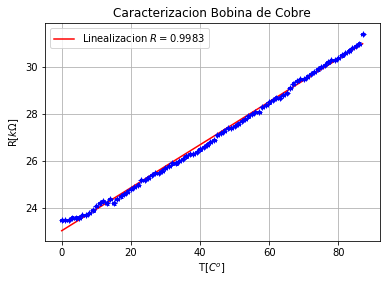

In [54]:
Tco = 0; Tcf = 87
Tc = np.linspace(Tco,Tcf,Tcf-Tco+1)
Ro = 23.4
Rc = np.array([23.5,23.5,23.5,23.6,23.6,23.6,23.7,23.7,23.8,23.9,24.1,24.2,24.3,24.2,24.4,24.2,24.4,24.5,24.6,24.7,
             24.8,24.9,25.,25.2,25.2,25.3,25.4,25.5,25.5,25.6,25.7,25.8,25.9,25.9,26.,26.1,26.2,26.3,26.3,26.4,
             26.5,26.6,26.7,26.8,26.9,27.1,27.2,27.3,27.4,27.4,27.5,27.6,27.7,27.8,27.9,28.,28.1,28.1,28.3,28.4,
             28.5,28.6,28.7,28.7,28.8,28.9,29.1,29.3,29.4,29.5,29.5,29.6,29.7,29.8,29.9,30.,30.1,30.2,30.3,30.3,
             30.4,30.5,30.6,30.7,30.8,30.9,31.,31.4])

TcErr = 0.5;RcErr =0.05 
slopec, interceptc, r_valuec, p_valuec, std_errc = sp.stats.linregress(Tc,Rc)
polynomial = np.poly1d([slopec, interceptc])
line = polynomial(Tc)
plt.plot(Tc, line, 'r-', label ="Linealizacion $R ={0:.4f}$".format(r_valuec)) 
plt.plot(Tc,Rc,".b")
plt.errorbar(Tc, Rc, RcErr, TcErr,ecolor = "b",fmt='+b',capsize = 1.5)
plt.grid(True)
plt.ylabel("R$[k\Omega]$")
plt.xlabel("T$[C^{o}]$")
plt.title("Caracterizacion Bobina de Cobre")
plt.legend()
plt.savefig("Bobina")

print "Incertidumbre de escala temperatura",TcErr
print "Incertidumbre de escala en el voletaje",RcErr
print "Desviación estándar en la temperatura", np.std(Tc)
print "punto de corte", interceptc,"Error punto de corte", Error_linealizacion(Tc,Rc)[0]
print "Pendiente", slopec, "Error pendiente ", Error_linealizacion(Tc,Rc)[1]


        


Para la bobina se obtuvo una relación lineal, bien definidida dada por la siguiente ecuación

$$R = (0.09\pm0.01)\left[\frac{k\Omega}{C^{o}}\right]T + (23.04\pm0.48)[k\Omega] $$



# Diodo

550


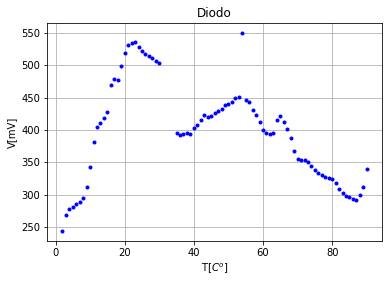

In [15]:
x1d = np.arange(2,31);x2d = np.arange(35,91)
Td = np.concatenate((x1d,x2d),axis = 0)
Vd = np.array([244,269,278,281,285,289,294,312,343,382,404,410,418,427,470,479,477,499,519,531,535,536,528,522,
               517,514,511,507,503,395,392,393,396,393,403,408,415,423,420,421,426,430,432,438,440,444,
              450,451,550,446,444,431,423,412,400,396,393,395,415,421,413,401,388,368,355,353,354,350,344,338,334,
              330,327,325,324,318,308,302,298,296,293,291,299,311,340])

plt.plot(Td,Vd,"b.")
plt.xlabel("T$[C^{o}]$")
plt.ylabel("V[mV]")
plt.title("Diodo")
plt.grid(True)
print np.max(Vd)

Cuando el diodo se somete a la corriente I en la polarización correcta, se cumple la siguiente ecuación

$$I = I_{o}e^{-\frac{eV_{o}}{k_{B}T}}\left(e^{\frac{eV_{o}}{k_{B}T}}-1\right)$$

Asumiendo que $eV >> k_{B}T$ se llega a la siguiente expresión

$$I = I_{o}e^{\frac{e(V-V_{o})}{k_{B}T}}$$

En el arreglo experimental se fijo una corriente constante , por lo tanto se tiene 

$$Ln\left(\frac{I}{I_{o}}\right) = \frac{e(V-V_{o})}{k_{B}T} \longrightarrow V = \frac{k_{B}T}{e}Ln\left(\frac{I}{I_{o}}\right)+V_{o}$$

Definiendo 

$$b = \frac{k_{B}}{e}Ln\left(\frac{I}{I_{o}}\right) $$

Podriamos linealizar de la siguiente manera

$$V = V_{o} + bT$$

y de esta manera encontrar el voltaje de saturación para el diodo

# LM35

Pendiente de la recta : 0.0108994245806 Error pendiente:  0.074096740817
Punto de corte de la recta: -0.0201689334703 Error punto de corte:  0.00140168604324


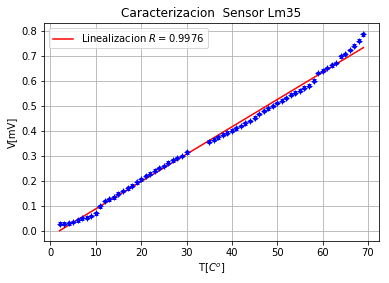

In [16]:
x1lm = np.linspace(2,30,29);x2lm = np.linspace(35,89,55)
Tlm = np.concatenate((x1lm,x2lm),axis = 0)
Vcc = 5.
Vs = 0.
I = 0.
Vlm = np.array([30,30,31,37,43,51,54,60,71,99,120,127,135,150,160,170,181,194,206,219,229,241,251,260,273,
               282,292,300,314,357,365,374,385,393,401,410,420,430,440,453,466.474,480,490,499,510,
               520,530,544,552,560,572,580,600,630,640,650,661,670,697,707,722,740,760,785,810,830,850,862,877,
               894,915,935,955,976,1000,1020,1038,1051,1073,1089,1102,1109,1111,1117])/1000.

TlmErr = 0.05;VlmErr =5/1000. 
a = 20
slopelm, interceptlm, r_valuelm, p_valuelm, std_errlm = sp.stats.linregress(Tlm[0:-a],Vlm[0:-a])
polynomial = np.poly1d([slopelm, interceptlm])
line = polynomial(Tlm)
plt.plot(Tlm[0:-a], line[0:-a], 'r-', label ="Linealizacion $R ={0:.4f}$".format(r_valuelm)) 
plt.plot(Tlm[0:-a],Vlm[0:-a],"b.")
plt.errorbar(Tlm[0:-a], Vlm[0:-a], VlmErr, TlmErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("T$[C^{o}]$")
plt.ylabel("V[mV]")
plt.legend()
plt.title("Caracterizacion  Sensor Lm35")
plt.savefig("LM35")

print "Pendiente de la recta :" , slopelm, "Error pendiente: ",Error_linealizacion(Tlm,Vlm)[0]
print "Punto de corte de la recta:", interceptlm, "Error punto de corte: ", Error_linealizacion(Tlm,Vlm)[1]


El coeficiente térmico se calcula a partir de la ecuación que se linealiza y está dada por la siguiente expresión

$$V = (10.90 \pm 7.40)\left[\frac{mV}{C^{o}}\right] -(20.17 \pm 1.40) mV$$

# ideas de proyecto

+ Caracterizar la conveccion en agua
+ automatizaciones
+ Expansion volumétrica del agua

Pendiente -0.00231655189885 Error:  0.038172368346
punto de corte 0.543579880703 Error 0.000619762770153
0.77211836638
1.10302623769
0.00471148656802


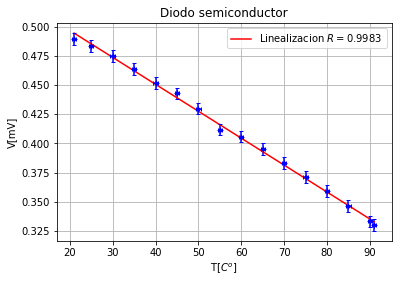

In [62]:
Vd = np.array([0.49,0.484,0.475,0.464,0.452,0.443,0.43,0.412,0.406,0.395,0.383,0.371,0.359,0.346,0.333,0.33])
Td = np.array([21.,25.,30.,35.,40.,45.,50.,55.,60.,65.,70.,75.,80.,85.,90.,91.])


TdErr = 0.5;VdErr=0.005
sloped, interceptd, r_valued, p_valued, std_errd = sp.stats.linregress(Td,Vd)
polynomial = np.poly1d([sloped, interceptd])
line = polynomial(Td)
plt.plot(Td, line, 'r-', label ="Linealizacion $R ={0:.4f}$".format(r_valuec)) 
plt.plot(Td,Vd,"b.")
plt.errorbar(Td, Vd, VdErr, TdErr,ecolor = "b",fmt='+b',capsize = 2)
plt.grid(True)
plt.title("Diodo semiconductor")
plt.xlabel("T$[C^{o}]$")
plt.ylabel("V[mV]")
plt.legend()
plt.savefig("Diodo")


print "Pendiente", sloped,"Error: ", Error_linealizacion(Td,Vd)[0]
print "punto de corte", interceptd , "Error",Error_linealizacion(Td,Vd)[1]

print 0.7*np.exp(-1*(sloped)/(Kb))
print np.exp(-1*(sloped)/(Kb))
print 0.7**2*((sloped)/(Kb))**2